In [148]:
import pandas as pd
import numpy as np
import math as mt
from numpy import dot
from numpy.linalg import norm

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
# matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

# Similarity Document
- 종류 References : https://aplab.tistory.com/16

## Euclidean Distance (유클리드 거리)
- 거리 기반 (Distance Based) 데이터 유사도 측정에 쓰이는 알고리즘 이다.
- 두 점 사이의 거리를 계산할 때 쓰이는 알고리즘이다.
- 실제 거리 측정에도 사용하기는 하지만, 인공지능 분야에서는 2 가지 개체의 속성값들이 여러개 일 경우, 이들 속성값들에 의한 두 개체 사이의 유사도를 구할 때 자주 사용한다.
- 공식의 특징은 두 벡터의 순차적인 점들간의 오차제곱합을 가진다.

$$
euclidean\ distance(a,b)\\
=\sqrt{\sum^{n}_{i=1}(a_i-b_i)^2}
$$

### 2차원 공간 안에서의 euclidean distance

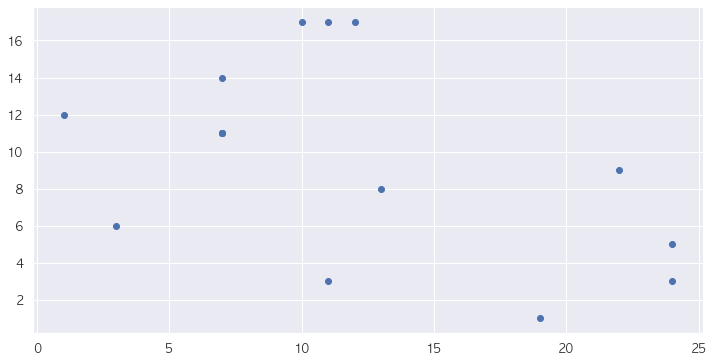

In [74]:
# 1. DataSet
datas = np.round((np.random.rand(15,2) * 25))

# 2. sctter plot
x_values = datas[:, 0]
y_values = datas[:, 1]

# 3. show scatter
plt.scatter(x_values, y_values)
plt.show()

datas [12. 17.] [ 7. 11.]
distance 7.810249675906654


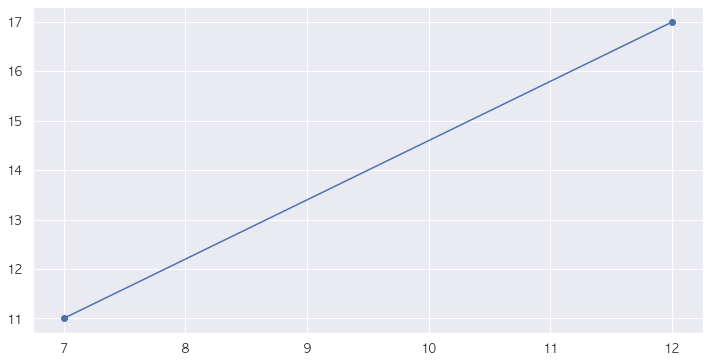

In [75]:
# 4. 2개의 데이터만을 가지고 euclidean distance 구하기
a = datas[0]
b = datas[1]

print("datas", a,b)

distance = mt.sqrt(((a[0] - b[0]) ** 2)\
        + ((a[1] - b[1]) ** 2))
print("distance", distance)

x_values = datas[:2, 0]
y_values = datas[:2, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, y_values)
plt.show()

#### 이 때, 두 점 사이의 거리는 피타고라스 정리에 의하면 다음과 같이 정리할 수 있다.
$$
(19-9)^2+(10-0)^2=\\
100+100=200\\
\sqrt{200}\\
=14.142135623730951
$$
---
#### 즉, 유클리디안 거리는 점 들간의 거리에 피타고라스 정리를 대입한 알고리즘이다.

### n차원 공간 안에서의 euclidean distance

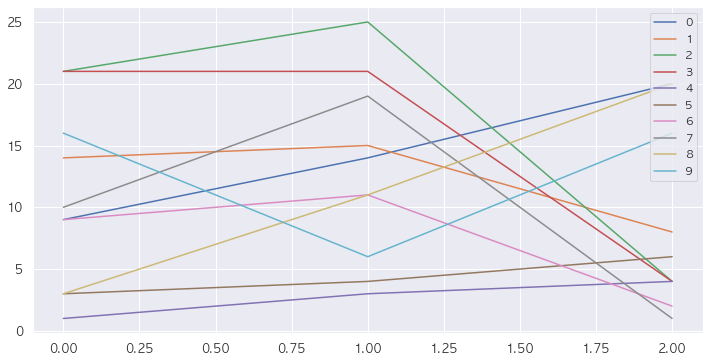

In [82]:
# 1. DataSet
datas = np.round((np.random.rand(10,3) * 25))
sequence = range(0, 3)

for idx,_ in enumerate(datas):
    plt.plot(sequence, _, label=idx)

plt.legend()
plt.show()

In [92]:
def euclidean_distance(A, B):
    err = 0
    length = len(A)
    for idx in range(0, length):
        tmp = ((A[idx] - B[idx]) ** 2)
        err += tmp
        
    return mt.sqrt(err)

datas [ 9. 11.  2.] [ 9. 14. 20.]
distance 18.24828759089466


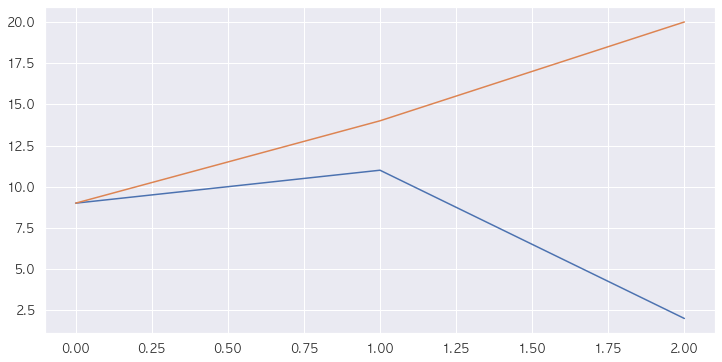

In [114]:
A = datas[6]
B = datas[0]

print("datas", A,B)

euc_dis = euclidean_distance(A, B)
print("distance", euc_dis)

# show plot
plt.plot(A)
plt.plot(B)

#### 이 두 벡터의 거리는 12.206555615733702 가 된다.
---
- 이렇게 어떠한 두 벡터간의 거리를 측정하는데, 사용할 수 있다.
- 거리 기반을 벡터에 대입하면, 두 벡터가 얼마나 가깝게 밀접해있느냐를 뜻한다.
- 하지만 거리기반이기 때문에 방향에 대한 유사도 측정은 어렵다.
- 아래의 예시에서, 위의 벡터들보다 두 벡터간의 방향성이 유사함에도 거리가 멀기 때문에, 이는 거리기반 유사도 판정에서는 부적절하다는 결과를 출력할 것 이다.

datas [1. 3. 4.] [ 9. 14. 20.]
distance 21.0


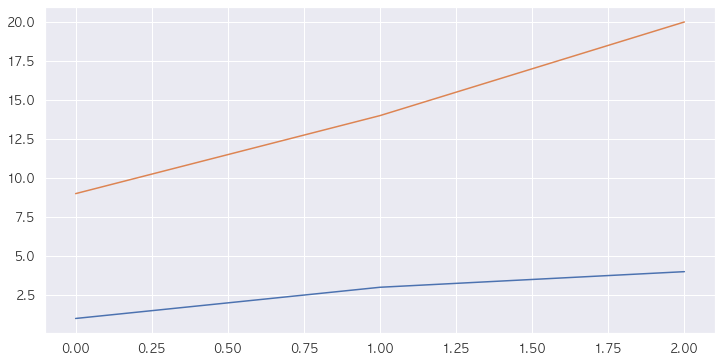

In [115]:
A = datas[4]
B = datas[0]

print("datas", A, B)

euc_dis = euclidean_distance(A, B)
print("distance", euc_dis)

# show plot
plt.plot(A)
plt.plot(B)

## Manhattan Distance (맨해튼 거리)
- euclidean distance가 쓰윽 가로지르는 느낌이라면, 맨해튼 거리는 두 벡터 사이에 차원 실수를 직교 좌표계에 일정한 좌표축의 점 위에 투영한 선분 길이의 합을 말한다.
- 거리기반 유사도 측정 알고리즘이다.
- 때문에 euclidean distance와 유사한 특징들을 보인다. (방향성 유사도 평가에는 좋지 않다.)
- 어떠한 벡터의 절대오차값들의 합이다.

$$
manhantten\ distance(A,B)=\\
\sum^n_{i=1}\left\vert A_i-B_i \right\vert
$$

In [119]:
def manhatten_distance(A, B):
    err = 0
    length = len(A)
    for idx in range(0, length):
        tmp = abs(A[idx] - B[idx])
        err += tmp
        
    return err

In [120]:
A = datas[6]
B = datas[0]

print("datas", A,B)

man_dis = manhatten_distance(A, B)
print("distance", man_dis)

datas [ 9. 11.  2.] [ 9. 14. 20.]
distance 21.0


In [121]:
A = datas[4]
B = datas[0]

print("datas", A, B)

man_dis = manhatten_distance(A, B)
print("distance", man_dis)

datas [1. 3. 4.] [ 9. 14. 20.]
distance 35.0


## Cosine Similarity (코사인 유사도)
- 벡터 A와 벡터 B의 각도로 계산된다.
- -1 ~ 1 사이의 값을 가지며, -1은 반대, 0은 서로 독립, 1은 완전히 같은 경우디ㅏ.
- 데이터 간에 스케일 차이가 날 경우 사용한다.
- 거리등을 전혀 고려하지 않기 때문에 먼 거리에 있는 벡터가 방향성만 맞다면, 적절하게 평가된다.
- 공식은 두 벡터 A와 B의 내적을 두 벡터의 크기 곱으로 이루어져 있다.
- 특정 길이에 구애받지 않아, 두 벡터의 크기가 달라도 계산된다.

$$
cosine\ similarity(A,B)=\\
\frac{A\centerdot B}
{\begin{Vmatrix}A\end{Vmatrix}\begin{Vmatrix}B\end{Vmatrix}}=\\
\frac{\sum^n_{i=1} A_i\times B_i}
{\sqrt{\sum^n_{i=1}(A_i)^2}\times\sqrt{\sum^n_{i=1}(B_i)^2}}
$$

In [126]:
def cosine_similarity(A,B):
    return dot(A, B) / (norm(A) * norm(B))

datas [ 9. 11.  2.] [ 9. 14. 20.]
similarity 0.7363846877807729


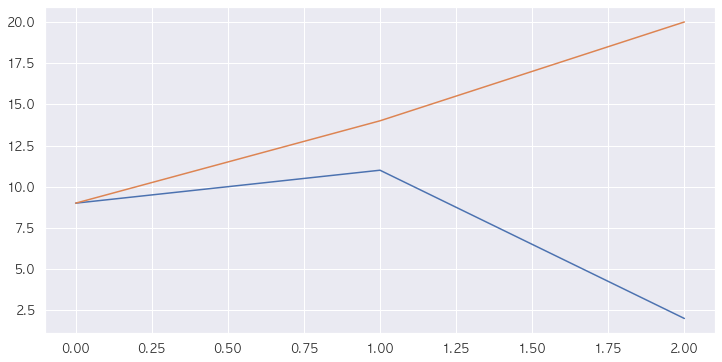

In [129]:
A = datas[6]
B = datas[0]

print("datas", A,B)

cos_sim = cosine_similarity(A, B)
print("similarity", cos_sim)

# show plot
plt.plot(A)
plt.plot(B)

datas [1. 3. 4.] [ 9. 14. 20.]
similarity 0.9873935531794589


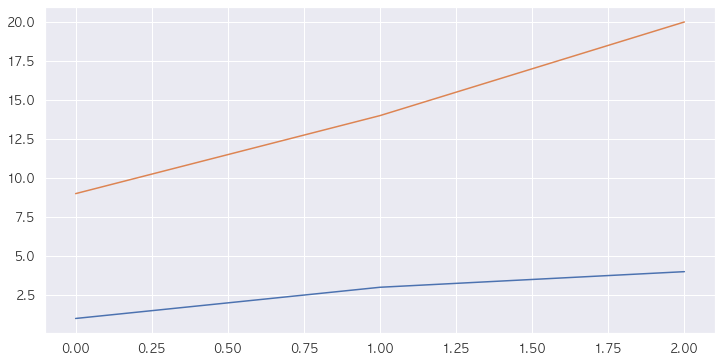

In [130]:
A = datas[4]
B = datas[0]

print("datas", A,B)

cos_sim = cosine_similarity(A, B)
print("similarity", cos_sim)

# show plot
plt.plot(A)
plt.plot(B)

## An improved collaborative recommendation algorithm based on optimized user similarity
- balancing factor 라는 것을 기존 전통적인 cosine similarity 알고리즘에 추가한다. 코사인 유사도는 벡터가 가진 scale을 고려하지 않는다는 특징이 있었는데, 이는 기존의 코사인 유사도가 가지는 한계점을 scale을 고려할 수 있는 term을 생성해 가중치로 사용하는 방식이다.

$$
sumDiffer(A,B)=\\
\sqrt{\Sigma_{i\in I_{a,b}}(A_{a,i}-B_{b,i})^2/M}
$$
- 첫 시작은 이러하다. 두 벡터간의 오차제곱합의 평균을 구하면 된다.
- 이는 딥러닝 모델의 성능 지표로 쓰이는 MSE(Mean Squared Error)와 같은 개념인데, 이를 활용하게 되면 벡터가 가지는 scale을 임의의 MSD가 가진 scale을 고려하는 특징을 사용할 수 있게 되는 것이다.

$$
w(A,B)=\\
\lambda^{sumDiffer(A,B)},\ 0<\lambda <1
$$
- sumDiffer(A,B)의 결과값을 지수로 사용하여, 가중치를 얻는다.
- 람다는 0과 1사이의 값이라, 제곱할수록 값이 0에 가까워지게 되는데, sumDiffer(A,B) term 이 람다의 지수로 들어가기 때문에 작으면 작을수록, 즉 가까우면 가까울수록 가중치는 커지게 되는 결과를 얻게된다.

$$
imp\ sim(A,B)=\\
cosine\ similarity(A,B)\centerdot
w(A,B)
$$
- 마지막으로 구한 가중치를 이와 같이 기존의 코사인 유사도에서 얻은 similarity에 곱한다.
- 결론적으로는 코사인 유사도가 가지는 한계점을 극복하기 위하여 MSE의 값을 가중치로 이용하여, scale을 고려할 수 있게 만든셈이다.

In [135]:
def sumDiffer(A,B):
    length = len(A)
    err = 0
    for idx in range(0, length):
        err += ((A[idx] - B[idx]) ** 2)
    return mt.sqrt(err / length)

def improved_similarity(A, B, w):
    cos_sim = cosine_similarity(A, B)
    sum_diff = sumDiffer(A, B)
    w **= sum_diff
    
    return cos_sim * w

datas [ 9. 11.  2.] [ 9. 14. 20.]
similarity 0.24267200152782945


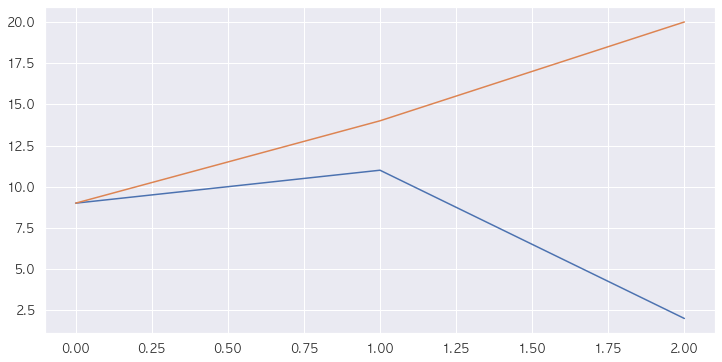

In [144]:
weight = 0.9

A = datas[6]
B = datas[0]

print("datas", A,B)

imp_sim = improved_similarity(A, B, weight)
print("similarity", imp_sim)

# show plot
plt.plot(A)
plt.plot(B)

datas [1. 3. 4.] [ 9. 14. 20.]
similarity 0.27523914366502494


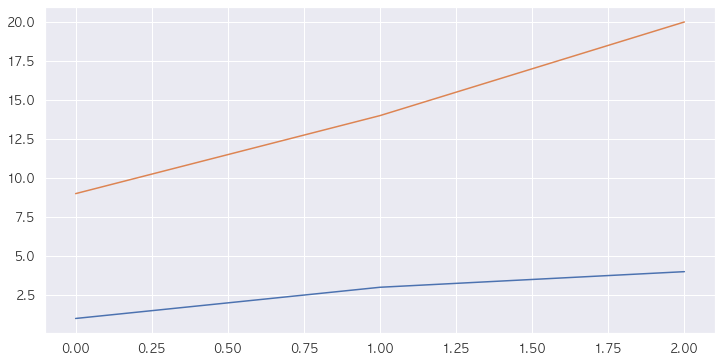

In [145]:
A = datas[4]
B = datas[0]

print("datas", A,B)

imp_sim = improved_similarity(A, B, weight)
print("similarity", imp_sim)

# show plot
plt.plot(A)
plt.plot(B)

##### 활용. euclidean distance, cosine similarity, imp similarity 는 각각 어떠한 벡터 A의 최고 유사도로 어떤 벡터를 골라낼까?
- data의 shape는 정확한 테스트를 해보기 위하여 64개의 sequence 데이터를 가지고 있는 데이터들의 집합으로 테스트를 진행하겠다.

In [244]:
datas = np.round((np.random.rand(20,16) * 500))
sim_df = pd.DataFrame(columns=['유클리디안 거리', '코사인 유사도', '향상된 코사인 유사도'])

A = datas[0]
B_values = datas[1:]
imp_weight = 0.99

for idx,B in enumerate(B_values):
    sim_df.loc[idx] = [
        euclidean_distance(A,B),
        cosine_similarity(A,B),
        improved_similarity(A, B, imp_weight)
    ]
    
sim_df

,유클리디안 거리,코사인 유사도,향상된 코사인 유사도
0,847.598372,0.717680,0.085316
1,1016.980334,0.660599,0.051311
2,749.759962,0.743873,0.113073
3,788.445940,0.739244,0.101961
4,929.492872,0.680685,0.065869
5,562.067612,0.862365,0.210069
6,852.285164,0.724370,0.085103
7,722.676968,0.794267,0.129235
8,715.349565,0.797517,0.132175
9,655.822384,0.866694,0.166814


#### 거리기반 (euclidean distance)

In [255]:
sim_df.sort_values(by=["유클리디안 거리"])

,유클리디안 거리,코사인 유사도,향상된 코사인 유사도
5,562.067612,0.862365,0.210069
9,655.822384,0.866694,0.166814
18,657.054031,0.843629,0.161873
17,695.472501,0.781126,0.136088
14,715.041258,0.795437,0.131933
8,715.349565,0.797517,0.132175
7,722.676968,0.794267,0.129235
10,724.755821,0.768548,0.124399
2,749.759962,0.743873,0.113073
16,759.634122,0.776589,0.115154


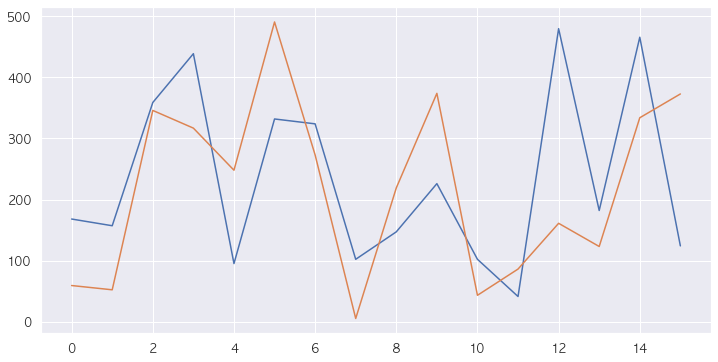

In [256]:
best_idx = sim_df.sort_values(by=["유클리디안 거리"]).index[0]

plt.plot(A, label="A")
plt.plot(B_values[best_idx], label="B")
plt.show()

#### 방향기반 (cosine similarity)

In [257]:
sim_df.sort_values(by=["코사인 유사도"], ascending=False)

,유클리디안 거리,코사인 유사도,향상된 코사인 유사도
9,655.822384,0.866694,0.166814
5,562.067612,0.862365,0.210069
18,657.054031,0.843629,0.161873
8,715.349565,0.797517,0.132175
14,715.041258,0.795437,0.131933
7,722.676968,0.794267,0.129235
17,695.472501,0.781126,0.136088
16,759.634122,0.776589,0.115154
10,724.755821,0.768548,0.124399
11,776.112105,0.755302,0.107455


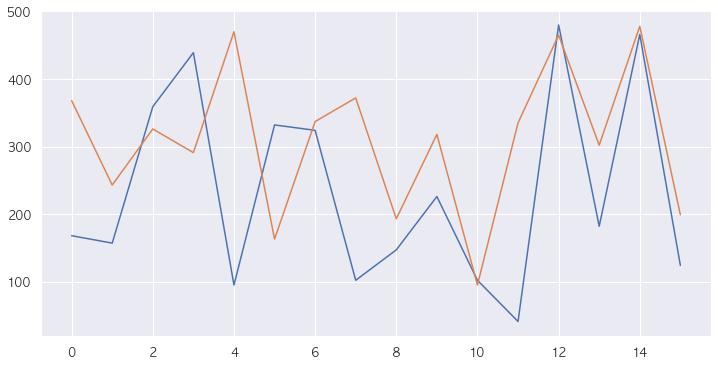

In [258]:
best_idx = sim_df.sort_values(by=["코사인 유사도"], ascending=False).index[0]

plt.plot(A, label="A")
plt.plot(B_values[best_idx], label="B")
plt.show()

#### 거리 + 방향기반 (euclidean + cosine)

In [259]:
sim_df.sort_values(by=["향상된 코사인 유사도"], ascending=False)

,유클리디안 거리,코사인 유사도,향상된 코사인 유사도
5,562.067612,0.862365,0.210069
9,655.822384,0.866694,0.166814
18,657.054031,0.843629,0.161873
17,695.472501,0.781126,0.136088
8,715.349565,0.797517,0.132175
14,715.041258,0.795437,0.131933
7,722.676968,0.794267,0.129235
10,724.755821,0.768548,0.124399
16,759.634122,0.776589,0.115154
2,749.759962,0.743873,0.113073


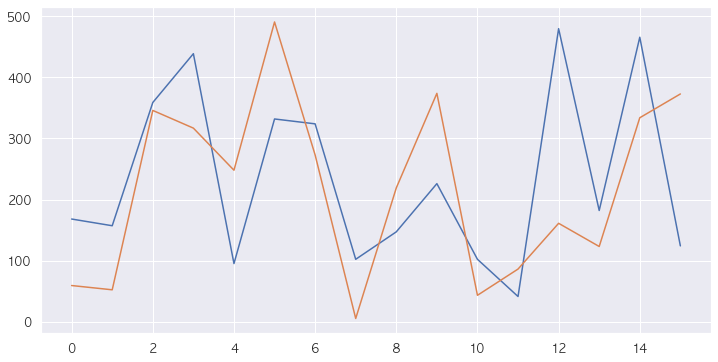

In [260]:
best_idx = sim_df.sort_values(by=["향상된 코사인 유사도"], ascending=False).index[0]

plt.plot(A, label="A")
plt.plot(B_values[best_idx], label="B")
plt.show()

In [266]:
print("유클리디안 거리 표준편차",sim_df['유클리디안 거리'].std())
print("코사인 유사도 표준편차",sim_df['코사인 유사도'].std())

유클리디안 거리 표준편차 109.52299797244923
코사인 유사도 표준편차 0.06076745641405494


- 향상된 코사인 유사도는 코사인 유사도에 term 가중치를 이용해서, 방향성에 scale 개념을 넣어줬다.
- 그래서 거리기반에서의 결과물과 방향기반에서의 결과물 사이의 어긋남을 어느정도 중재해주는 성격을 가지고 있다.
- 이는 순위별 차이를 보면 알 수 있는데, 
    - 유클리디안 거리 표준편차에 근사하게 차이가 나는데도 코사인 유사도는 거리를 보지 않기 때문에, 오로지 방향에만 집중해서 거리를 무시하고, 방향 유사도가 높은 대상을 올려놨다. (파란색, 빨간색)
        - 향상된 코사인 유사도는 이를 바로 잡아줬다.
    - 코사인 유사도 표준 편차가 넘게 방향을 넘어섰는데도 유클리디안 거리는 방향을 보지 않기 때문에, 오로지 거리에만 집중해서 방향을 무시하고, 거리 유사도가 높은 대상을 올려놨다. (초록색)
        - 향상된 코사인 유사도는 이들 사이에 중간에 넣음으로서, 이를 중재시켜놨다.

In [299]:
euc_dis_std = sim_df['유클리디안 거리'].std()
cos_sim_std = sim_df['코사인 유사도'].std()

length = len(sim_df)
sort_euc_based = sim_df.sort_values(by=["유클리디안 거리"])
err_cos_sim_std = 0

for idx in range(1, length):
    err = abs(sort_euc_based.iloc[idx-1]['코사인 유사도']\
        - sort_euc_based.iloc[idx]['코사인 유사도'])

    if err > (cos_sim_std * 0.8):
        err_cos_sim_std += 1
        
print("[distance based] 각 순위 사이, 표준 편차의 80%를 넘어서게 차이난 개수 :", err_cos_sim_std)

sort_cos_based = sim_df.sort_values(by=["코사인 유사도"])
err_euc_dis_std = 0

for idx in range(1, length):
    err = abs(sort_cos_based.iloc[idx-1]['유클리디안 거리']\
        - sort_cos_based.iloc[idx]['유클리디안 거리'])

    if err > (euc_dis_std * 0.8):
        err_euc_dis_std += 1
        
print("[cosine similarity] 각 순위 사이, 표준 편차의 80%를 넘어서게 차이난 개수 :", err_euc_dis_std)

[distance based] 각 순위 사이, 표준 편차의 80%를 넘어서게 차이난 개수 : 2
[cosine similarity] 각 순위 사이, 표준 편차의 80%를 넘어서게 차이난 개수 : 5


In [300]:
imp_cos_based = sim_df.sort_values(by=["향상된 코사인 유사도"])
err_cos_sim_std = 0
err_euc_dis_std = 0

for idx in range(1, length):
    err_euc_dis = abs(imp_cos_based.iloc[idx-1]['유클리디안 거리']\
        - imp_cos_based.iloc[idx]['유클리디안 거리'])
    err_cos_sim = abs(imp_cos_based.iloc[idx-1]['코사인 유사도']\
        - imp_cos_based.iloc[idx]['코사인 유사도'])

    if err_euc_dis > (euc_dis_std * 0.8):
        err_euc_dis_std += 1
    if err_cos_sim > (cos_sim_std * 0.8):
        err_cos_sim_std += 1

print("[imp : distance based] 각 순위 사이, 표준 편차의 80%를 넘어서게 차이난 개수 :", err_euc_dis_std)
print("[imp : cosine similarity] 각 순위 사이, 표준 편차의 80%를 넘어서게 차이난 개수 :", err_cos_sim_std)

[imp : distance based] 각 순위 사이, 표준 편차의 80%를 넘어서게 차이난 개수 : 1
[imp : cosine similarity] 각 순위 사이, 표준 편차의 80%를 넘어서게 차이난 개수 : 2


##### 각 유사도 평가 알고리즘들이 참고할 수 없는 것들을 참고할 수 있도록 구성된 수식었다. 그래서 각 순위 사이의 편차 줄이기를 거리, 방향 둘 다 따져가면서 할 수 있다.